In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-mrna-vaccine-degradation-41/sample_submission.csv
/kaggle/input/covid-19-mrna-vaccine-degradation-41/train.csv
/kaggle/input/covid-19-mrna-vaccine-degradation-41/test.csv
/kaggle/input/stanford-covid-vaccine/sample_submission.csv
/kaggle/input/stanford-covid-vaccine/train.json
/kaggle/input/stanford-covid-vaccine/test.json
/kaggle/input/stanford-covid-vaccine/post_deadline_files/private_test_labels.csv
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences_submission.csv
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences.csv
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences_bpps/100.npy
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences_bpps/193.npy
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences_bpps/63.npy
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences_bpps/64.npy
/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences_bpps/

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('/kaggle/input/covid-19-mrna-vaccine-degradation-41/train.csv')
test = pd.read_csv('/kaggle/input/covid-19-mrna-vaccine-degradation-41/test.csv')

In [5]:
train.columns

Index(['id', 'id_seqpos', 'sequence', 'structure', 'predicted_loop_type',
       'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
       'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C',
       'deg_50C', 'deg_error_50C', 'b1_sequence', 'a1_sequence',
       'b1_structure', 'a1_structure', 'b1_predicted_loop_type',
       'a1_predicted_loop_type', 'b2_sequence', 'a2_sequence', 'b2_structure',
       'a2_structure', 'b2_predicted_loop_type', 'a2_predicted_loop_type',
       'b3_sequence', 'a3_sequence', 'b3_structure', 'a3_structure',
       'b3_predicted_loop_type', 'a3_predicted_loop_type', 'b4_sequence',
       'a4_sequence', 'b4_structure', 'a4_structure', 'b4_predicted_loop_type',
       'a4_predicted_loop_type', 'b5_sequence', 'a5_sequence', 'b5_structure',
       'a5_structure', 'b5_predicted_loop_type', 'a5_predicted_loop_type'],
      dtype='object')

In [6]:
# train['Full_sequence'] = train[['b5_sequence','b4_sequence',
#                                 'b3_sequence','b2_sequence','b1_sequence','sequence',
#                                 'a1_sequence','a2_sequence','a3_sequence','a4_sequence',
#                                 'a5_sequence']].apply(lambda x: ','.join(x.dropna().astype()),axis=1)
# # train['Full_sequence']train.apply(lambda train:train['b5_sequence']+train['b4_sequence']+train['b3_sequence']+train['b2_sequence']+train['b1_sequence'],train['sequence']+train['a1_sequence']+train['a2_sequence']+train['a3_sequence']+train['a4_sequence']+train['a5_sequence'])

In [7]:
train['Full_sequence'] = pd.Series(train['b5_sequence']+train['b4_sequence']+train['b3_sequence']+train['b2_sequence']+train['b1_sequence'],train['sequence']+train['a1_sequence']+train['a2_sequence']+train['a3_sequence']+train['a4_sequence']+train['a5_sequence']).index

In [8]:
train['Full_structure'] = pd.Series(train['b5_structure']+train['b4_structure']+train['b3_structure']+train['b2_structure']+train['b1_structure'],train['structure']+train['a1_structure']+train['a2_structure']+train['a3_structure']+train['a4_structure']+train['a5_structure']).index

In [9]:
train['Full_predicted_loop_type'] = pd.Series(train['b5_predicted_loop_type']+train['b4_predicted_loop_type']+train['b3_predicted_loop_type']+train['b2_predicted_loop_type']+train['b1_predicted_loop_type'],train['predicted_loop_type']+train['a1_predicted_loop_type']+train['a2_predicted_loop_type']+train['a3_predicted_loop_type']+train['a4_predicted_loop_type']+train['a5_predicted_loop_type']).index

In [10]:
train

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,Full_sequence,Full_structure,Full_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,S,C,A,.,),I,S,AUCGCA,...))),HHHSSS
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,H,C,C,.,.,B,H,GACGUC,..((..,IISSHH
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,S,A,G,(,(,S,S,GGGAUG,((((((,SSSSSS
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,S,A,U,.,(,E,S,GGCGGU,((((((,SSSSSS
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,S,G,G,(,.,S,H,UACGAG,(((((.,SSSSSH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130555,id_796128149,id_796128149_27,U,),S,0.1244,0.0393,0.2672,0.0728,0.1479,...,S,A,A,.,.,H,M,UGAGAA,)..)).,SIISSM
130556,id_8a466e770,id_8a466e770_39,A,.,X,0.0201,0.0351,0.1271,0.0583,0.0580,...,X,A,U,.,.,H,X,AAGAAU,......,XXXXXX
130557,id_998669e76,id_998669e76_52,A,.,H,0.4597,0.0601,0.2014,0.0515,0.2838,...,I,U,U,.,),H,S,ACCAGU,.))).),HSSSIS
130558,id_6fe4a1abc,id_6fe4a1abc_45,G,.,I,0.3634,0.1063,0.1928,0.0738,0.1885,...,I,G,G,),),S,S,GGUGGG,.))..),ISSIIS


In [11]:
train.b5_predicted_loop_type.unique()

array(['I', 'B', 'S', 'E', 'H', '-1', 'X', 'M'], dtype=object)

In [12]:
!pip install forgi
!pip install viennarna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 55.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for logging-exceptions: filename=logging_exceptions-0.1.9-py3-none-any.whl size=7943 sha256=fcfc3b75d4900cf089f25e84db3494cd112e8ae5a646b01f380ec080b98aaa60
  Stored in directory: /root/.cache/pip/wheels/8b/55/70/ebbb68a1b48659a6af32232072356499ae47bfc95623bcd619
Successfully built logging-exceptions
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 70.9 MB/s eta 0:00:0000:010:01


In [13]:
import os, math, random
from collections import Counter

import RNA
import subprocess
from forgi.graph import bulge_graph
import forgi.visual.mplotlib as fvm
from IPython.display import Image, SVG

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style

In [25]:
Sequence = 'GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC'[:64]
structure = '...()()..()(....)....(.)........()(....)....(.)........()(....)....(.)........()(....)....(.).......'[:64]
predicted_loop_type = 'SSSSSMMSSSSSIISSSSSSHHHHSSSBSSSISSSSSMMSSSSSIISSSSSSHHHHSSSBSSSIISSSSSMMMMMMSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE'[:64]
bg, = bulge_graph.BulgeGraph.from_fasta_text('>seq\n' + Sequence + '\n' + structure)
print("Sequence :",Sequence)
print("Structure :",structure)
print("Predicted Loop type :",predicted_loop_type)
print("Generated Loop type :", bg.to_element_string())

Sequence : GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACC
Structure : ...()()..()(....)....(.)........()(....)....(.)........()(....).
Predicted Loop type : SSSSSMMSSSSSIISSSSSSHHHHSSSBSSSISSSSSMMSSSSSIISSSSSSHHHHSSSBSSSI
Generated Loop type : fffssssmmssshhhhsmmmmshsmmmmmmmmssshhhhsmmmmshsmmmmmmmmssshhhhst


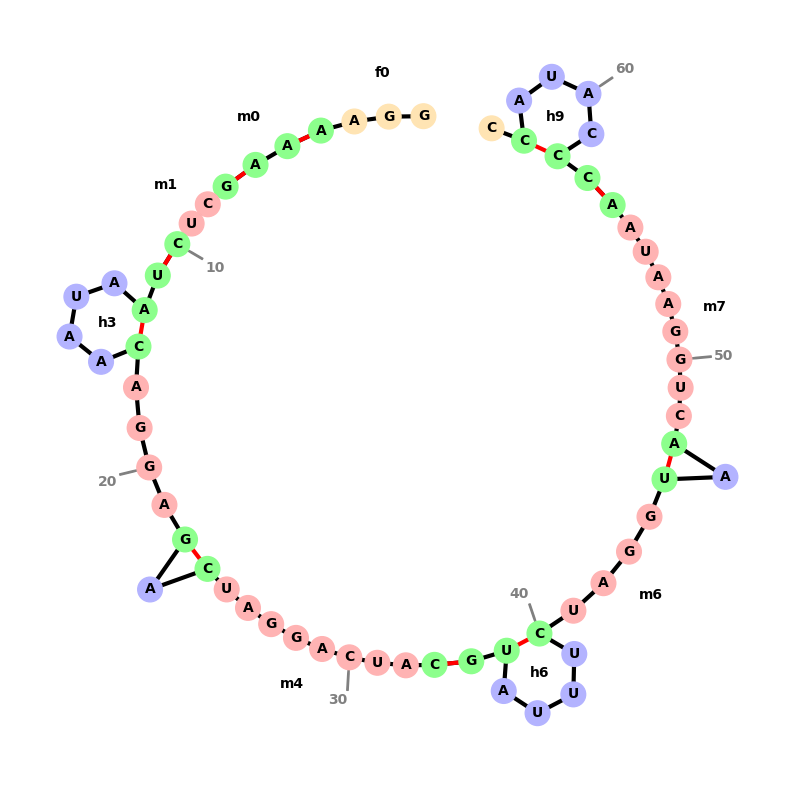

In [17]:
plt.figure(figsize=(10,10))
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,
             backbone_kwargs={"linewidth":3})
plt.show()

In [ ]:
def createRNA(Sequence,structure,predicted_loop_type):
    bg, = bulge_graph.BulgeGraph.from_fasta_text('>seq\n' + Sequence + '\n' + structure)
    plt.figure(figsize=(10,10))
    fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,
                 backbone_kwargs={"linewidth":3})
    plt.show()

In [ ]:
train['Position'] = train.id_seqpos.apply(lambda x : int(x[13:]))

In [ ]:
train = train.sort_values(by=['id','Position'])

In [ ]:
train.iloc[0,0]

In [ ]:
grouped_data = train.groupby('id').agg(lambda x: x.tolist())

In [ ]:
ox = pd.read_csv('/kaggle/input/stanford-covid-vaccine/post_deadline_files/new_sequences.csv')

In [ ]:
ox

In [ ]:
print(len(ox.sequence[0]))
print(ox.structure[0])
print()

In [ ]:
# Sequence = ''.join(grouped_data.Full_sequence[20][:-17])
# structure= ''.join(grouped_data.Full_structure[20][:-17])
# predected_loop = ''.join(grouped_data.Full_sequence[20][:-17])
# createRNA(Sequence,structure,predected_loop)
# ------------------------------------------------
for i in range(0,len(ox.sequence)):
    if len(ox.sequence[i])<600:
        print(i)

In [ ]:
    s=6
    
    Sequence = ox.sequence[s]
    structure= ox.structure[s]
    predected_loop = ox.bpRNA_string[s]
    createRNA(Sequence,structure,predected_loop)

In [ ]:
print(Sequence[:-17])
print(structure[:-17])

In [ ]:
l=[]
for i in train.id.unique():
    l.append(list(train.id.values).count(i))    

In [ ]:
plt.hist(l,bins=[40,45,50,55,60,65],rwidth=0.5,color=['c'])
plt.title('Arbitrary identifier')
plt.xlabel('Identifier frequency' )
plt.ylabel('count' )
plt.show()

In [ ]:
train.describe()

In [ ]:
train